In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from pywaffle import Waffle
import math

In [2]:
base = pd.read_csv('Base mesclada filtrada.csv')

In [3]:
base.drop(labels=['YrSold','YearBuilt','Unnamed: 0'], axis=1, inplace=True)

In [4]:
base.head()

,SalePrice,MSZoning,HeatingQC,BedroomAbvGr,GarageArea,LotArea,FullBath,YrSold - YearBuilt
0,208500.0,RL,Ex,3,548.0,8450,2,5
1,181500.0,RL,Ex,3,460.0,9600,2,31
2,223500.0,RL,Ex,3,608.0,11250,2,7
3,140000.0,RL,Gd,3,642.0,9550,1,91
4,250000.0,RL,Ex,4,836.0,14260,2,8


In [5]:
base.shape

(2919, 8)

In [6]:
base.corr()

,SalePrice,BedroomAbvGr,GarageArea,LotArea,FullBath,YrSold - YearBuilt
SalePrice,1.000000,0.229611,0.464809,0.296497,0.433710,-0.363226
BedroomAbvGr,0.229611,1.000000,0.073912,0.132801,0.356125,0.052136
GarageArea,0.464809,0.073912,1.000000,0.213251,0.408487,-0.480602
LotArea,0.296497,0.132801,0.213251,1.000000,0.125826,-0.025143
FullBath,0.433710,0.356125,0.408487,0.125826,1.000000,-0.470686
YrSold - YearBuilt,-0.363226,0.052136,-0.480602,-0.025143,-0.470686,1.000000


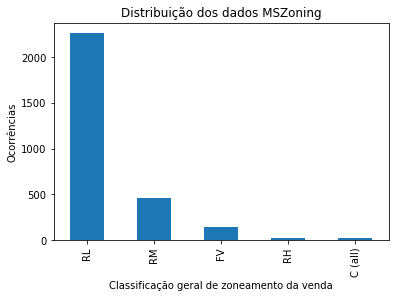

In [7]:
base['MSZoning'].value_counts().to_frame().plot(kind='bar', legend=None)
plt.title('Distribuição dos dados MSZoning')
plt.ylabel('Ocorrências')
plt.xlabel('Classificação geral de zoneamento da venda')
plt.show()

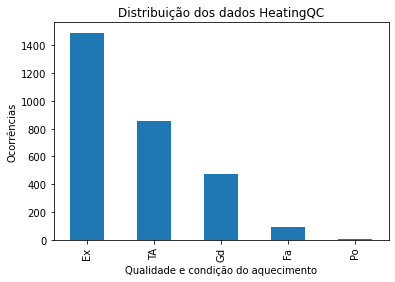

In [8]:
base['HeatingQC'].value_counts().to_frame().plot(kind='bar', legend=None)
plt.title('Distribuição dos dados HeatingQC')
plt.ylabel('Ocorrências')
plt.xlabel('Qualidade e condição do aquecimento')
plt.show()

In [9]:
base['MSZoning'].shape[0]

2919

In [10]:
valores_grafico = (base['MSZoning'].value_counts()/base['MSZoning'].shape[0]*100).apply(lambda x: math.ceil(x)).to_dict()

In [11]:
valores_grafico

{'RL': 78, 'RM': 16, 'FV': 5, 'RH': 1, 'C (all)': 1}

In [12]:
# compensar para o gráfico ficar mais bonito
valores_grafico['RL']=valores_grafico['RL']-1

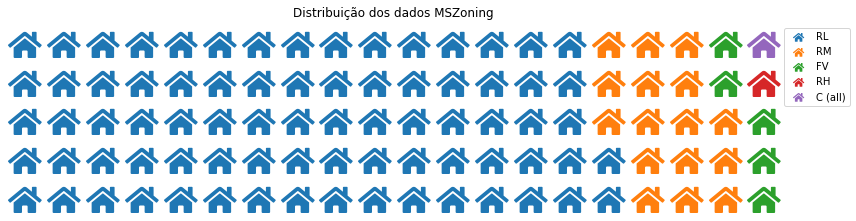

In [13]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=valores_grafico, 
    cmap_name="tab10",
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='home', 
    font_size=30, 
    icon_legend=True,
    figsize=(12, 8)
)
plt.title('Distribuição dos dados MSZoning')
plt.show()

In [14]:
valores_grafico2 = (base['HeatingQC'].value_counts()/base['HeatingQC'].shape[0]*100).apply(lambda x: math.ceil(x)).to_dict()

In [15]:
valores_grafico2

{'Ex': 52, 'TA': 30, 'Gd': 17, 'Fa': 4, 'Po': 1}

In [16]:
# compensar para o gráfico ficar maos bonito
valores_grafico2['Ex']=valores_grafico2['Ex']+1

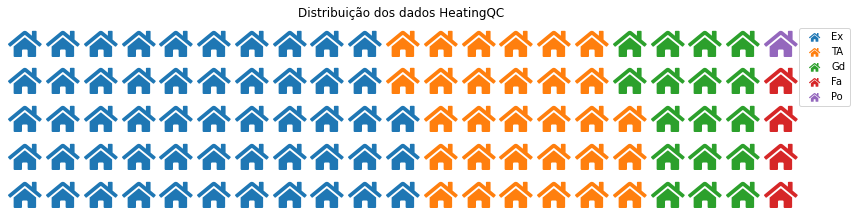

In [17]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=valores_grafico2, 
    cmap_name="tab10",
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='home', 
    font_size=30, 
    icon_legend=True,
    figsize=(12, 8)
)
plt.title('Distribuição dos dados HeatingQC')
plt.show()

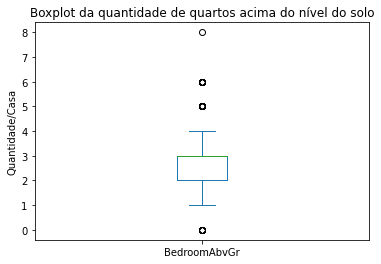

In [18]:
base[['BedroomAbvGr']].plot(kind='box')
plt.title('Boxplot da quantidade de quartos acima do nível do solo')
plt.ylabel('Quantidade/Casa')
plt.show()

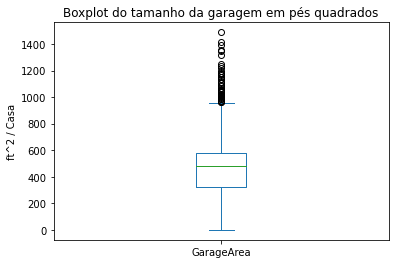

In [19]:
base[['GarageArea']].plot(kind='box')
plt.title('Boxplot do tamanho da garagem em pés quadrados')
plt.ylabel('ft^2 / Casa')
plt.show()

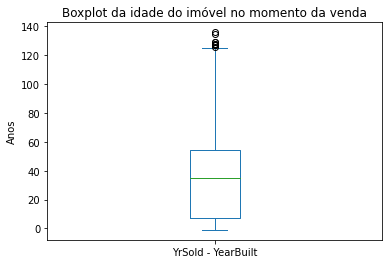

In [20]:
base[['YrSold - YearBuilt']].plot(kind='box')
plt.title('Boxplot da idade do imóvel no momento da venda')
plt.ylabel('Anos')
plt.show()

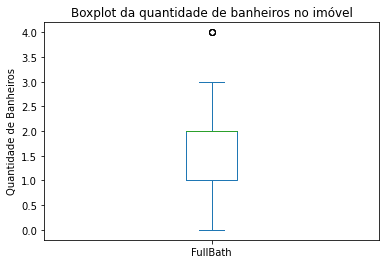

In [21]:
base[['FullBath']].plot(kind='box')
plt.title('Boxplot da quantidade de banheiros no imóvel')
plt.ylabel('Quantidade de Banheiros')
plt.show()

## Usando one-hot encoding para quantificar os dados qualitativos

In [22]:
dummy_MSZoning = pd.get_dummies(base['MSZoning'])
dummy_HeatingQC = pd.get_dummies(base['HeatingQC'])
base_dummy = base.merge(dummy_MSZoning,left_index=True,right_index=True)
base_dummy = base_dummy.merge(dummy_HeatingQC,left_index=True,right_index=True)

In [23]:
base_dummy.corr()

,SalePrice,BedroomAbvGr,GarageArea,LotArea,FullBath,YrSold - YearBuilt,C (all),FV,RH,RL,RM,Ex,Fa,Gd,Po,TA
SalePrice,1.000000,0.229611,0.464809,0.296497,0.433710,-0.363226,-0.075810,0.035770,-0.054856,0.210173,-0.230235,0.305709,-0.093934,-0.099081,-0.017271,-0.218063
BedroomAbvGr,0.229611,1.000000,0.073912,0.132801,0.356125,0.052136,-0.042963,-0.087169,0.024975,0.137434,-0.100253,-0.011929,-0.009871,-0.011007,-0.020546,0.027241
GarageArea,0.464809,0.073912,1.000000,0.213251,0.408487,-0.480602,-0.094305,0.113654,-0.046038,0.193937,-0.250265,0.314084,-0.116688,-0.106511,-0.010012,-0.212983
LotArea,0.296497,0.132801,0.213251,1.000000,0.125826,-0.025143,-0.021774,-0.102614,-0.031998,0.236318,-0.206661,0.018455,-0.005352,-0.022645,-0.000814,0.000193
FullBath,0.433710,0.356125,0.408487,0.125826,1.000000,-0.470686,-0.082038,0.165990,0.001530,0.124051,-0.216461,0.334659,-0.064748,-0.092800,-0.013614,-0.266381
YrSold - YearBuilt,-0.363226,0.052136,-0.480602,-0.025143,-0.470686,1.000000,0.155790,-0.240404,0.058366,-0.290233,0.412859,-0.459562,0.173118,0.160922,0.033332,0.305349
C (all),-0.075810,-0.042963,-0.094305,-0.021774,-0.082038,0.155790,1.000000,-0.020783,-0.008811,-0.172968,-0.040199,-0.057915,0.068350,-0.000601,-0.002981,0.038044
FV,0.035770,-0.087169,0.113654,-0.102614,0.165990,-0.240404,-0.020783,1.000000,-0.021198,-0.416131,-0.096713,0.192786,-0.040338,-0.063559,-0.007172,-0.144155
RH,-0.054856,0.024975,-0.046038,-0.031998,0.001530,0.058366,-0.008811,-0.021198,1.000000,-0.176424,-0.041003,-0.031354,-0.017102,-0.002195,-0.003041,0.042967
RL,0.210173,0.137434,0.193937,0.236318,0.124051,-0.290233,-0.172968,-0.416131,-0.176424,1.000000,-0.804905,0.056717,-0.030039,-0.048568,-0.059691,-0.007198


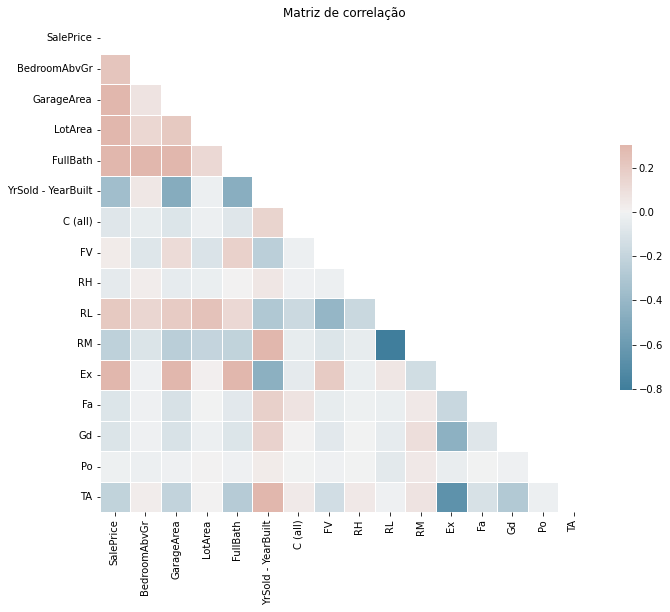

In [24]:
# Compute the correlation matrix
corr = base_dummy.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Matriz de correlação')
plt.show()